**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Trabajo Práctico Entregable - Parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files

sns.set_context('talk')
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.7.1


In [ ]:
df_melb = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

## Exploracion de los datos



Utilizamos algunas funciones de Pandas que resultaran utiles para conocer el _Dataset_



In [ ]:
df_melb.columns, df_melb.shape

(Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'Regionname', 'Propertycount'],
       dtype='object'),
 (13580, 21))

In [ ]:
df_melb[['Suburb', 'Postcode', 'CouncilArea', 'Regionname']].sample(5)

,Suburb,Postcode,CouncilArea,Regionname
106,Albert Park,3206.00,Port Phillip,Southern Metropolitan
8977,Vermont,3133.00,Whitehorse,Eastern Metropolitan
10700,Heidelberg,3084.00,Banyule,Eastern Metropolitan
5193,Reservoir,3073.00,Darebin,Northern Metropolitan
9194,Hoppers Crossing,3029.00,Wyndham,Western Metropolitan


## Ejercicio 1 - SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el _Dataset_ generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



### 1.1 Base de datos

Primero se importa dos elementos de la bilioteca [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy) para crear un motor de base de datos

In [ ]:
from sqlalchemy import create_engine, text

Luego se crea un motor de base de datos que representa la conexión a una base de datos y se utiliza para enviar comandos SQL y recibir resultados


In [ ]:
engine = create_engine('sqlite:///db_practico.sqlite3', echo=True)

Se escriben los datos del DataFrame ```df_melb``` en una tabla de datos llamada ``` db_melb ``` utilizando SQLAlchemy como motor de base de datos

In [ ]:
df_melb.to_sql('db_melb', con=engine, if_exists="replace")

2024-05-13 17:22:13,560 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-13 17:22:13,583 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_melb")


2024-05-13 17:22:13,591 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,599 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_melb")


2024-05-13 17:22:13,604 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,610 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2024-05-13 17:22:13,613 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,620 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("db_melb")


2024-05-13 17:22:13,624 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,634 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:13,637 INFO sqlalchemy.engine.Engine [raw sql] ('db_melb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_melb',)


2024-05-13 17:22:13,643 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("db_melb")


2024-05-13 17:22:13,648 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,699 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("db_melb")


2024-05-13 17:22:13,702 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,706 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:13,709 INFO sqlalchemy.engine.Engine [raw sql] ('db_melb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_melb',)


2024-05-13 17:22:13,719 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("db_melb")


2024-05-13 17:22:13,723 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,729 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_db_melb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_db_melb_index")


2024-05-13 17:22:13,737 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,747 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("db_melb")


2024-05-13 17:22:13,757 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,767 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_db_melb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_db_melb_index")


2024-05-13 17:22:13,769 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:13,786 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:13,793 INFO sqlalchemy.engine.Engine [raw sql] ('db_melb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_melb',)


2024-05-13 17:22:13,808 INFO sqlalchemy.engine.Engine 
DROP TABLE db_melb


INFO:sqlalchemy.engine.Engine:
DROP TABLE db_melb


2024-05-13 17:22:13,819 INFO sqlalchemy.engine.Engine [no key 0.01026s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01026s] ()


2024-05-13 17:22:13,903 INFO sqlalchemy.engine.Engine 
CREATE TABLE db_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE db_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2024-05-13 17:22:13,913 INFO sqlalchemy.engine.Engine [no key 0.01083s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01083s] ()


2024-05-13 17:22:13,930 INFO sqlalchemy.engine.Engine CREATE INDEX ix_db_melb_index ON db_melb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_db_melb_index ON db_melb ("index")


2024-05-13 17:22:13,935 INFO sqlalchemy.engine.Engine [no key 0.00535s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00535s] ()


2024-05-13 17:22:14,914 INFO sqlalchemy.engine.Engine INSERT INTO db_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO db_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-13 17:22:14,933 INFO sqlalchemy.engine.Engine [generated in 0.78558s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.78558s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2024-05-13 17:22:15,390 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


13580

### 1.2 Ingesta de datos

Para crear el DataFrame ```df_airbnb``` se debe primero descargar el .csv. Este pesa > 90 mb. Para poder acceder de forma más rapida exiten varias [maneras](https://stackoverflow.com/questions/71619540/how-to-upload-a-62-gb-datasets-to-google-colab)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Tambien se determinan las columnas de interes, ya que muchas eran _reviews_ de los mismos huespedes y generaban largas cadenas de texto que para este trabajo no lo vas a utilizar

In [ ]:
interesting_cols = [
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',]

Se carga el DataFrame con las columnas de interes y se crea la base de datos ```db_airbnb```



In [ ]:
df_airbnb = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)

<ipython-input-11-7dc77038a1e6>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)


In [ ]:
df_airbnb.columns, df_airbnb.shape

(Index(['street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
        'latitude', 'longitude', 'price', 'weekly_price', 'monthly_price'],
       dtype='object'),
 (22895, 11))

In [ ]:
df_airbnb.to_sql('db_airbnb', con=engine, if_exists="replace")

2024-05-13 17:22:19,932 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-13 17:22:19,953 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_airbnb")


2024-05-13 17:22:19,959 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,963 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_airbnb")


2024-05-13 17:22:19,966 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,968 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2024-05-13 17:22:19,971 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,975 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("db_airbnb")


2024-05-13 17:22:19,977 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,981 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:19,983 INFO sqlalchemy.engine.Engine [raw sql] ('db_airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_airbnb',)


2024-05-13 17:22:19,986 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("db_airbnb")


2024-05-13 17:22:19,988 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,991 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("db_airbnb")


2024-05-13 17:22:19,993 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:19,996 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:19,998 INFO sqlalchemy.engine.Engine [raw sql] ('db_airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_airbnb',)


2024-05-13 17:22:20,008 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("db_airbnb")


2024-05-13 17:22:20,017 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:20,024 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_db_airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_db_airbnb_index")


2024-05-13 17:22:20,027 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:20,033 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("db_airbnb")


2024-05-13 17:22:20,037 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:20,043 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_db_airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_db_airbnb_index")


2024-05-13 17:22:20,047 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-13 17:22:20,052 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2024-05-13 17:22:20,057 INFO sqlalchemy.engine.Engine [raw sql] ('db_airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('db_airbnb',)


2024-05-13 17:22:20,066 INFO sqlalchemy.engine.Engine 
DROP TABLE db_airbnb


INFO:sqlalchemy.engine.Engine:
DROP TABLE db_airbnb


2024-05-13 17:22:20,070 INFO sqlalchemy.engine.Engine [no key 0.00478s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00478s] ()


2024-05-13 17:22:20,158 INFO sqlalchemy.engine.Engine 
CREATE TABLE db_airbnb (
	"index" BIGINT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE db_airbnb (
	"index" BIGINT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2024-05-13 17:22:20,165 INFO sqlalchemy.engine.Engine [no key 0.00714s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00714s] ()


2024-05-13 17:22:20,193 INFO sqlalchemy.engine.Engine CREATE INDEX ix_db_airbnb_index ON db_airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_db_airbnb_index ON db_airbnb ("index")


2024-05-13 17:22:20,204 INFO sqlalchemy.engine.Engine [no key 0.01115s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01115s] ()


2024-05-13 17:22:21,047 INFO sqlalchemy.engine.Engine INSERT INTO db_airbnb ("index", street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO db_airbnb ("index", street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-13 17:22:21,055 INFO sqlalchemy.engine.Engine [generated in 0.62328s] ((0, 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, 'Brunswick East, VIC, Australia', 'Brunswick', 'Moreland', 'Brunswick East', 'VIC', '3057', -37.76650512, 144.9807361, 35, 200.0, 803.0), (2, 'St Kilda, VIC, Australia', 'St Kilda', 'Port Phillip', 'St Kilda', 'VIC', '3182', -37.85975502, 144.9773691, 159, 1253.0, 4452.0), (3, 'Thornbury, VIC, Australia', 'Thornbury', 'Darebin', 'Thornbury', 'VIC', '3071', -37.75897072, 144.9892279, 50, 250.0, 920.0), (4, 'St Kilda East, VIC, Australia', 'St Kilda East', 'Port Phillip', 'St Kilda East', 'VIC', '3183', -37.8645303, 144.9922379, 69, 400.0, 1900.0), (5, 'Berwick, VIC, Australia', None, 'Casey', 'Berwick', 'VIC', '3806', -38.05725414, 145.3393561, 98, 540.0, None), (6, 'Reservoir, VIC, Australia', None, 'Darebin', 'Reservoir', 'VIC', '3073', -37.69729418, 145.0008156, 50, 335.0, 

INFO:sqlalchemy.engine.Engine:[generated in 0.62328s] ((0, 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, 'Brunswick East, VIC, Australia', 'Brunswick', 'Moreland', 'Brunswick East', 'VIC', '3057', -37.76650512, 144.9807361, 35, 200.0, 803.0), (2, 'St Kilda, VIC, Australia', 'St Kilda', 'Port Phillip', 'St Kilda', 'VIC', '3182', -37.85975502, 144.9773691, 159, 1253.0, 4452.0), (3, 'Thornbury, VIC, Australia', 'Thornbury', 'Darebin', 'Thornbury', 'VIC', '3071', -37.75897072, 144.9892279, 50, 250.0, 920.0), (4, 'St Kilda East, VIC, Australia', 'St Kilda East', 'Port Phillip', 'St Kilda East', 'VIC', '3183', -37.8645303, 144.9922379, 69, 400.0, 1900.0), (5, 'Berwick, VIC, Australia', None, 'Casey', 'Berwick', 'VIC', '3806', -38.05725414, 145.3393561, 98, 540.0, None), (6, 'Reservoir, VIC, Australia', None, 'Darebin', 'Reservoir', 'VIC', '3073', -37.69729418, 145.0008156, 50, 335.0, 1400.0), (7, 'East Melbo

2024-05-13 17:22:21,429 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


22895

### 1.3 Consultas SQL

Mediante la funciuon ```read_sql_query``` de Pandas se pueden ejecutar consultas de manera más facil, pasando solo la consulta como una cadena de texto y el motor previamente creado


#### Cantidad de registros totales por ciudad

In [ ]:
query = "SELECT city, COUNT(*) AS total_city FROM db_airbnb GROUP BY city;"
pd.read_sql_query(query, engine)

2024-05-13 17:22:21,485 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) AS total_city FROM db_airbnb GROUP BY city;


INFO:sqlalchemy.engine.Engine:SELECT city, COUNT(*) AS total_city FROM db_airbnb GROUP BY city;


2024-05-13 17:22:21,495 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


,city,total_city
0,Banyule,203
1,Bayside,375
2,Boroondara,664
3,Brimbank,108
4,Cardinia,123
5,Casey,153
6,Darebin,698
7,Frankston,177
8,Glen Eira,631
9,Greater Dandenong,147


#### Cantidad de registros totales por barrio y ciudad

In [ ]:
query = 'SELECT neighborhood, city, COUNT(*) AS total_neighborhood_and_city FROM db_airbnb GROUP BY neighborhood, city ORDER BY COUNT(*) DESC;'
pd.read_sql_query(query, engine)

2024-05-13 17:22:21,607 INFO sqlalchemy.engine.Engine SELECT neighborhood, city, COUNT(*) AS total_neighborhood_and_city FROM db_airbnb GROUP BY neighborhood, city ORDER BY COUNT(*) DESC;


INFO:sqlalchemy.engine.Engine:SELECT neighborhood, city, COUNT(*) AS total_neighborhood_and_city FROM db_airbnb GROUP BY neighborhood, city ORDER BY COUNT(*) DESC;


2024-05-13 17:22:21,615 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


,neighborhood,city,total_neighborhood_and_city
0,Central Business District,Melbourne,3726
1,Southbank,Melbourne,1204
2,St Kilda,Port Phillip,1082
3,None,Yarra Ranges,771
4,South Yarra,Stonnington,759
...,...,...,...
129,Bentleigh,Bayside,1
130,Elwood,Bayside,1
131,Glen Iris,Whitehorse,1
132,Kensington,Moonee Valley,1


### 1.4 Combinacion de los _Dataset_

Para combinar las dos tablas se utiliza la operacion ```LEFT JOIN```, la cual permite combinarlas pero garantiza que todos los registros de la tabla izquierda ```db_melb``` esten presentes en el resultado final, incluso si no hay coincidencias en la tabla derecha ```db_airbnb```


In [ ]:
query_join = "SELECT * FROM db_melb LEFT JOIN (SELECT CAST(zipcode AS int) as zipcode_int, AVG(db_airbnb.price) AS airbnb_price_mean, COUNT(zipcode) AS airbnb_record_count, AVG(weekly_price) AS airbnb_weekly_price_mean, AVG(monthly_price) AS airbnb_monthly_price_mean FROM db_airbnb GROUP BY zipcode_int) AS airbnb_price_by_zipcode ON airbnb_price_by_zipcode.zipcode_int = CAST(db_melb.Postcode AS INT)"


In [ ]:
resultado = pd.read_sql_query(query_join, engine)
resultado[:20]

2024-05-13 17:22:21,748 INFO sqlalchemy.engine.Engine SELECT * FROM db_melb LEFT JOIN (SELECT CAST(zipcode AS int) as zipcode_int, AVG(db_airbnb.price) AS airbnb_price_mean, COUNT(zipcode) AS airbnb_record_count, AVG(weekly_price) AS airbnb_weekly_price_mean, AVG(monthly_price) AS airbnb_monthly_price_mean FROM db_airbnb GROUP BY zipcode_int) AS airbnb_price_by_zipcode ON airbnb_price_by_zipcode.zipcode_int = CAST(db_melb.Postcode AS INT)


INFO:sqlalchemy.engine.Engine:SELECT * FROM db_melb LEFT JOIN (SELECT CAST(zipcode AS int) as zipcode_int, AVG(db_airbnb.price) AS airbnb_price_mean, COUNT(zipcode) AS airbnb_record_count, AVG(weekly_price) AS airbnb_weekly_price_mean, AVG(monthly_price) AS airbnb_monthly_price_mean FROM db_airbnb GROUP BY zipcode_int) AS airbnb_price_by_zipcode ON airbnb_price_by_zipcode.zipcode_int = CAST(db_melb.Postcode AS INT)


2024-05-13 17:22:21,754 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode_int,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,...,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
2,2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,...,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
3,3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
4,4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,...,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
5,5,Abbotsford,129 Charles St,2,h,941000.00,S,Jellis,7/05/2016,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
6,6,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
7,7,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,...,Yarra,-37.81,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
8,8,Abbotsford,6/241 Nicholson St,1,u,300000.00,S,Biggin,8/10/2016,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03
9,9,Abbotsford,10 Valiant St,2,h,1097000.00,S,Biggin,8/10/2016,2.50,...,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,3067.00,130.62,258.00,605.15,2187.03


## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### 2.1 Columnas de interes

Primero se ven los datos relevantes de todas las columnas

In [ ]:
df_melb.describe(), df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

(         Rooms      Price  Distance  Postcode  Bedroom2  Bathroom      Car  \
 count 13580.00   13580.00  13580.00  13580.00  13580.00  13580.00 13518.00   
 mean      2.94 1075684.08     10.14   3105.30      2.91      1.53     1.61   
 std       0.96  639310.72      5.87     90.68      0.97      0.69     0.96   
 min       1.00   85000.00      0.00   3000.00      0.00      0.00     0.00   
 25%       2.00  650000.00      6.10   3044.00      2.00      1.00     1.00   
 50%       3.00  903000.00      9.20   3084.00      3.00      1.00     2.00   
 75%       3.00 1330000.00     13.00   3148.00      3.00      2.00     2.00   
 max      10.00 9000000.00     48.10   3977.00     20.00      8.00    10.00   
 
        Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
 count  13580.00       7130.00    8205.00   13580.00    13580.00       13580.00  
 mean     558.42        151.97    1964.68     -37.81      145.00        7454.42  
 std     3990.67        541.01      37.27

Teniendo en cuenta la columna **Type:**
- br - bedroom(s);
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;
- dev site - development site;
- o res - other residential.

Se clasifican las variables en **categóricas** y **numérica**

In [ ]:
categorical = [var for var in df_melb.columns if df_melb[var].dtype=='O']
categorical

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [ ]:
df_melb.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [ ]:
numerical = [var for var in df_melb.columns if (df_melb[var].dtype == float) or (df_melb[var].dtype == int)]
numerical

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [ ]:
round(df_melb.describe(),2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


Se cuentan los registros de las variables numéricas para tener nocion de la cantidad de datos faltantes respecto del total

In [ ]:
df_melb.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

'BuildingArea' y 'YearBuilt' tienen aproximadamente la mitad de los datos totales, lo cual van a ser descartadas para este primer analisis, mientras que 'Car' no representa una falta significativa



Para la elección de variables cuantitativas utilizaremos el coeficiente de correlación de Pearson y para elección de variables categóricas utilizaremos una medida denominada Razón de correlación.


1. **Coeficiente de correlación de Pearson**

    Nos da una medida de asociación lineal entre variables numéricas. Toma valores en un rango entre $-1$ y $1$ y, formalmente, deberíamos diferenciar su definición dependiendo si estamos calculándolo sobre una población o sobre una muestra (que es el que utilizaremos en la mayoría de los casos).

    El coeficiente de correlación de Pearson cuando se aplica a una **población**  se representa por la letra griega $\rho$. Dado un par de variables aleatorias $(X, Y)$, el coeficiente de correlación poblacional de Pearson (también denotado por $\rho_{X, Y}$ ) se define como
    $$
    \rho_{X, Y}=\frac{\sigma_{X Y}}{\sigma_{X} \sigma_{Y}}=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X) \operatorname{Var}(Y)}}
    $$

    Donde $\sigma_{X Y}$ es la covarianza de $(X, Y)$, $\sigma_{X}$ es la desviación estándar de la variable $X$ y $\sigma_{Y}$ es la desviación estándar de la variable $Y$

    El coeficiente de correlación de Pearson cuando es aplicado a una **muestra**, se denota por $r_{x y}$. Dados $n$ pares de datos $\left\{\left(x_{i}, y_{i}\right)\right\}_{i=1}^{n}$, se define el coeficiente de correlación muestral de Pearson como
$$
r_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
$$

    Donde $n$ es el tamaño de la muestra, $x_{i}, y_{i}$ son puntos muestrales individuales indexados con $i$ y $\bar{x}$ denota la media muestral definida por $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}$ (análogamente para $\bar{y}$ ).





2. **Razón de correlación** (a menudo marcada con la letra griega $\eta$ )

    Es un medida que nos permite cuantificar la relación entre la variable cuantitativa continua que queremos predecir, es decir Price y las variables categóricas que hemos elegido. La Razón de Correlación trabaja con una variable dependiente, que sería la cuantitativa, y una variable independiente, la cual pasaría a ser la categórica. Entonces, la relación se establece entre una variable independiente y una dependiente, lo cual  implica que la influencia de “X” sobre “Y” no siempre será la misma que la influencia de “Y” sobre “X”.

    Matemáticamente, se define como la varianza ponderada de la media de cada categoría dividida por la varianza de todas las muestras; esto es, la Razón de Correlación responde a la siguiente pregunta: dado un número continuo, ¿qué tan bien puedes saber a qué categoría pertenece?. La salida de $\eta$ está en el rango de $[0,1]$.

    El límite $\eta=0$ representa el caso especial de la no dispersión entre la medias de las diferentes categorías (se refiere al caso sin dispersión en las categorías que contribuyen a la dispersión global), mientras $\eta=1$ se refiere a la no dispersión dentro de las respectivas categorias. Para $\eta=1$ la dispersión de la muestra global se debe únicamente a la dispersión entre las categorías y en absoluto debido a la dispersión dentro de las categorías individuales.

    Para calcular este coeficiente utilizaremos la librería Dython$^{(2)}$, específicamente el módulo llamado 'nominal'$^{(3)}$ .


(1) https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

(2) https://github.com/shakedzy/dython

(3) http://shakedzy.xyz/dython/modules/nominal/

#### Análisis de la razón de correlación


Primero se analiza la razón de correlación para la elección de variables categóricas, para esto es necesario instalar [dython](https://github.com/shakedzy/dython) para facilitar el análisis

In [ ]:
#!pip install git+https://github.com/shakedzy/dython.git
#!pip install matplotlib==3.1.1

In [ ]:
from dython.nominal import associations

Se calcula la razón de correlacion entre las variables categóricas y 'Price'

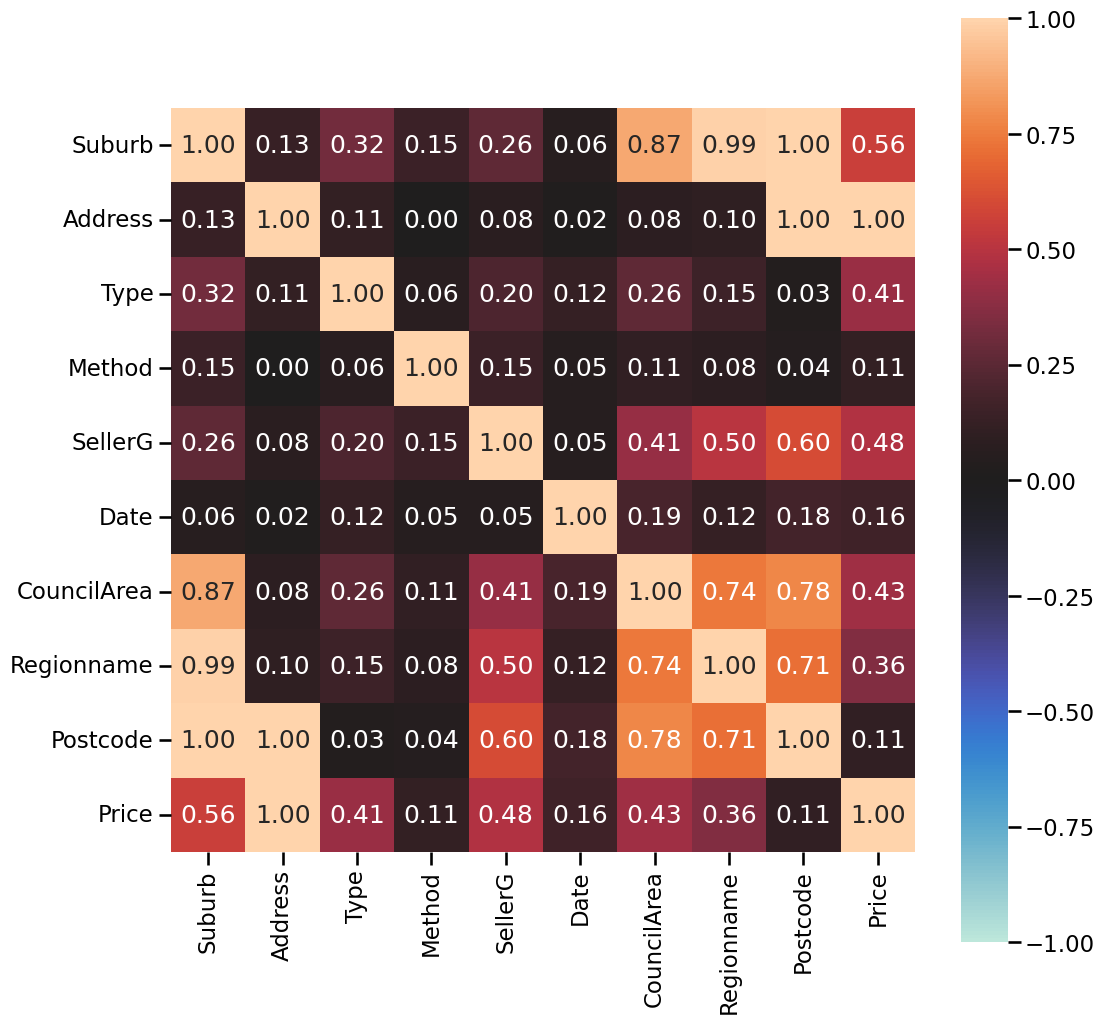

{'corr':              Suburb  Address  Type  Method  SellerG  Date  CouncilArea  \
 Suburb         1.00     0.13  0.32    0.15     0.26  0.06         0.87   
 Address        0.13     1.00  0.11    0.00     0.08  0.02         0.08   
 Type           0.32     0.11  1.00    0.06     0.20  0.12         0.26   
 Method         0.15     0.00  0.06    1.00     0.15  0.05         0.11   
 SellerG        0.26     0.08  0.20    0.15     1.00  0.05         0.41   
 Date           0.06     0.02  0.12    0.05     0.05  1.00         0.19   
 CouncilArea    0.87     0.08  0.26    0.11     0.41  0.19         1.00   
 Regionname     0.99     0.10  0.15    0.08     0.50  0.12         0.74   
 Postcode       1.00     1.00  0.03    0.04     0.60  0.18         0.78   
 Price          0.56     1.00  0.41    0.11     0.48  0.16         0.43   
 
              Regionname  Postcode  Price  
 Suburb             0.99      1.00   0.56  
 Address            0.10      1.00   1.00  
 Type               0.15      0.0

In [ ]:
associations(df_melb[categorical+['Postcode', 'Price']], nom_num_assoc='correlation_ratio', figsize=(12, 12))

En el caso del coeficiente $\eta$, se toma en cuenta la magnitud del resultado para indicar la proporción en la que una variable X explica la varianza en una variable Y, y se define en un rango que va de 0 a 1, siendo:

*	$0-0,3$ correlación baja.

*	$0,4-0,6$ correlación media.

*	$0,7-1$ correlación alta.

**En base a lo expuesto anteriormente, miramos los valores de $\eta$ mayores a $0.4$**

$\eta(\text{Price},\text{Suburb})= 0.56$

$\eta(\text{Price},\text{Address})= 1$

$\eta(\text{Price},\text{Type})= 0.41$

$\eta(\text{Price},\text{SellerG})= 0.48$

$\eta(\text{Price},\text{CouncilArea})= 0.43$

y optamos por las siguientes variables categóricas para la predicción del valor de la propiedad en Melbourne:

- Address.

- Suburb.

- SellerG.

- CouncilArea.

- Type.

Se guardan las columnas de interes y se eliminan el resto de las columnas

In [ ]:
interesting_columns_categ = ['Address', 'Suburb', 'SellerG', 'CouncilArea', 'Type']

In [ ]:
df_melb_f= df_melb.copy()

In [ ]:
columns_to_drop = ['Postcode', 'Suburb', 'Address', 'Type', 'Method', 'CouncilArea', 'Regionname', 'SellerG']
df_melb_f = df_melb.drop(columns_to_drop, axis=1)

Ahora se analiza la razón de correlación de las variables numéricas

Se convierte la fecha a un valor tipo ```int```



In [ ]:
df_melb_f['Date'] = pd.to_datetime(df_melb_f['Date'], format='%d/%m/%Y')

<Axes: >

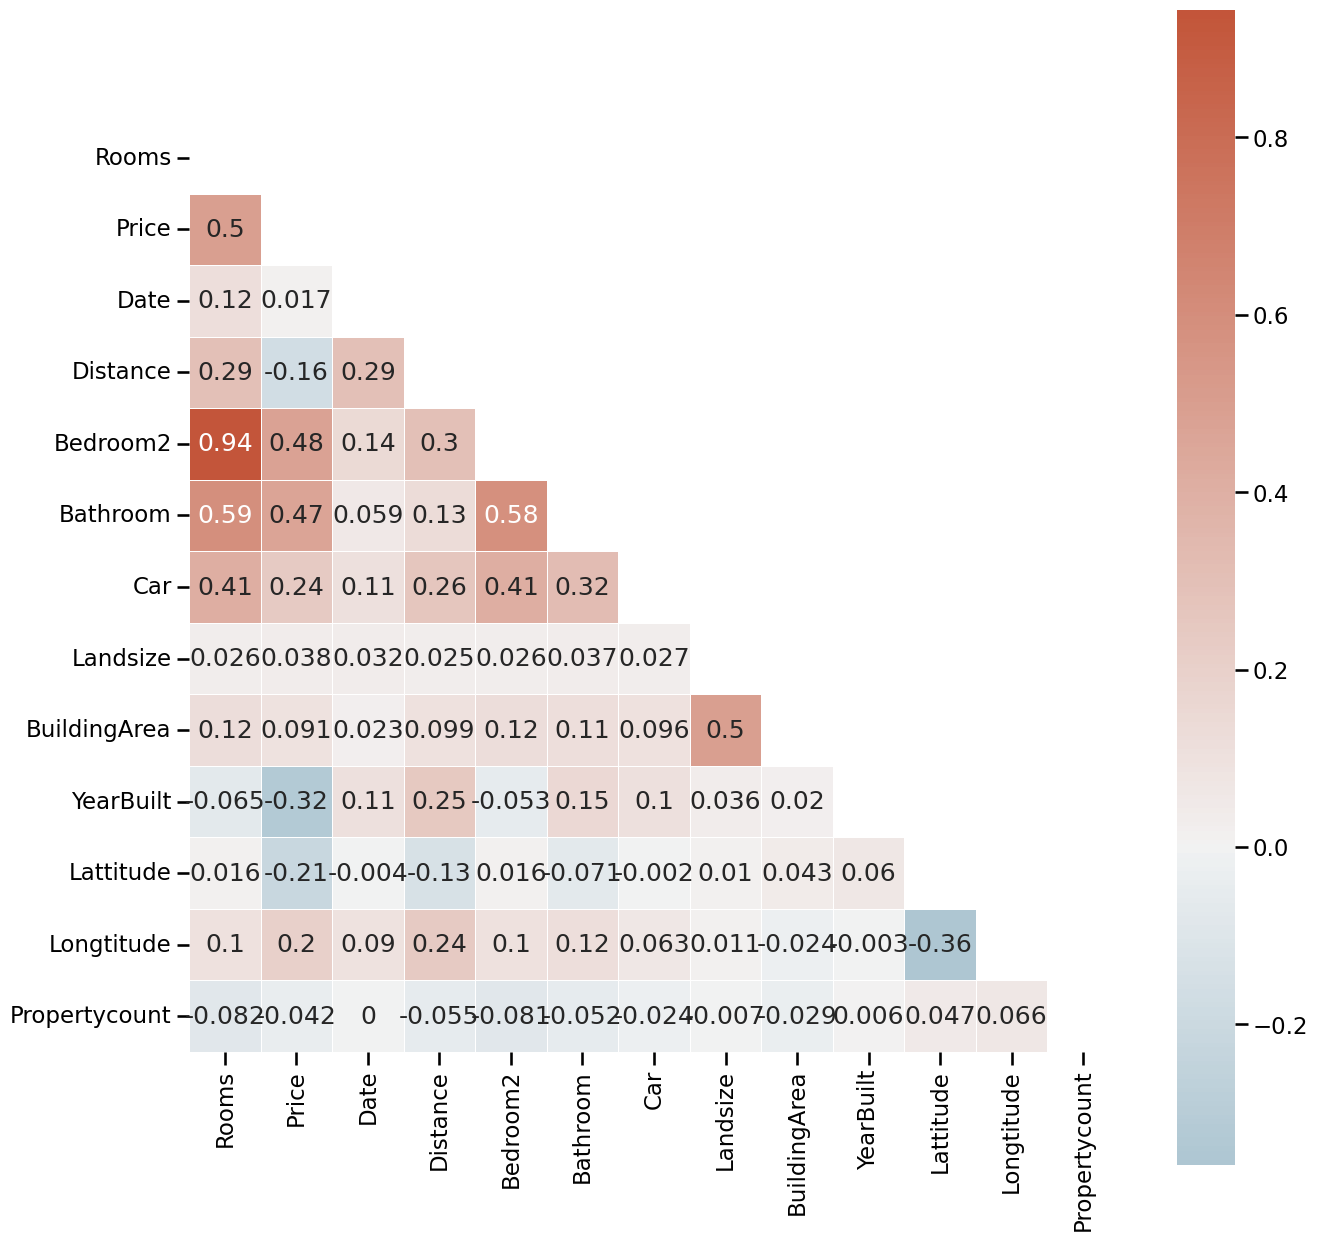

In [ ]:
mask = np.triu(np.ones_like(df_melb_f.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(df_melb_f.corr(),3), mask=mask, cmap=cmap,annot=True, center=0,
            square=True, linewidths=.5)

BuildingArea tiene  un coeficiente de correlación $r=0.5$ con la variable Landsize, que si bien es un grado de asociación moderado, decidimos conservar dentro de las columnas relevantes a BuildingArea a pesar de que ésta tiene un $47.49\%$ de valores faltantes (esta variable es necesaria conservarla para la segunda parte del entregable).

Aclarado lo anterior, miraremos los coeficientes de correlación muestrales mayores a 0.5 en valor absoluto $(\mid r \mid >0.5)$ y nos quedaremos con solo una variable del par:

- $r(\text{Bedroom2}, \text{rooms})=0.94$
- $r(\text{Bathroom}, \text{rooms})=0.59$
- $r(\text{Bathroom}, \text{Bedroom2})=0.58$

Nos quedamos con la variable Rooms; descartamos Bathroom y Bedroom2 .

En resumen, las variables numéricas que vamos a incluir en columnas relevantes serán:
 - BuildingArea
 - Rooms
 - Propertycount
 - Lattitude
 - Longtitude
 - Distance
 - YearBuilt
 - Car


Se actualiza la lista de variables relevantes

In [ ]:
interesting_columns_categ_num=['Address', 'Suburb', 'SellerG', 'CouncilArea',
                               'Type', 'BuildingArea', 'Rooms', 'Propertycount',
                               'Lattitude','Longtitude', 'Distance', 'YearBuilt',
                               'Car']

Como en la lista de columnas relevantes vamos a incluir a longitud y latitud, consideramos que la variable Address sería redundante en una primera instancia.

Por otro lado, si bien la variable Postcode no fue seleccionada bajo los criteros que ulitizamos, va a ser incluida en las columnas de interés ya que la consigna del punto siguiente nos pide combinar los datos de Melbourne con los de AirBnb utilizando la variable zipcode lo cual se hace necesario considerar a Postcode para hacer dicha operación.

Luego nuestra lista de variables para predecir el valor de una propiedad es la siguiente:

In [ ]:
interesting_columns_melb=['Suburb', 'SellerG', 'CouncilArea', 'Type', 'BuildingArea', 'Rooms',
                          'Propertycount', 'Lattitude','Longtitude', 'Distance', 'YearBuilt', 'Car','Postcode']

#### Análisis de valores extremos o irrelevantes para la predicción de valores de las propiedades

- Variable numérica continua **BuildinArea**: por medio de un boxplot podemos visualizar los valores atípicos. Además, en el resumen de variables observamos que BuildinArea tiene un mínimo menor de 0 metros cuadrados lo cual no es posible.

In [ ]:
#deteccion de puntos atípicos
k = 75
percentile_75 = df_melb['BuildingArea'].quantile(k/ 100)
j=25
percentile_25 = df_melb['BuildingArea'].quantile(j/ 100)

RIQ= percentile_75 - percentile_25 #rango intercuartilico
limite_inf= percentile_25 - (1.5*RIQ)
limite_sup= percentile_75 + (1.5*RIQ)
print(limite_inf, limite_sup)

-28.5 295.5


Notemos que el límite inferior del bigote es $-28.5$, un valor que no pertenece a la muestra, por lo que el valor $0$ quedará como valor de dicho límite. Por este motivo consideramos utilizar a los percentiles como método para remover los outliers.

En este caso consideraremos como outliers los valores de BuildingArea por debajo  del percentil $1\%$  y los valores por encima del percentil $95\%$.

Decidimos utilizar estos valores porque son los aceptables para que no se considere al valor $0$ como parte de la muestra y para que la cantidad de outliers por arriba no sea excesivo.

In [ ]:
df_melb_f.columns

Index(['Rooms', 'Price', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

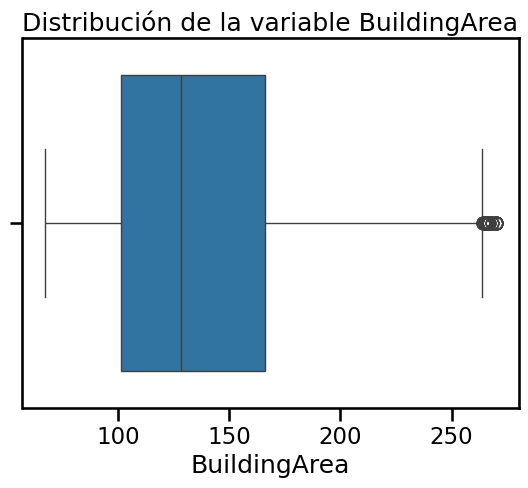

In [ ]:
max_limit = df_melb_f['BuildingArea'].quantile(.93)
min_limit= df_melb_f['BuildingArea'].quantile(.1)
data = df_melb_f[~((df_melb_f['BuildingArea'] > max_limit) | (df_melb_f['BuildingArea'] < min_limit))]['BuildingArea']
sns.boxplot(x=data)
plt.title('Distribución de la variable BuildingArea')
plt.show()

In [ ]:
mask_b=~((df_melb['BuildingArea'] > max_limit) | (df_melb['BuildingArea'] < min_limit))
df_melb[mask_b].BuildingArea.isna().sum()

6450

- Variable numérica discreta **Rooms**: por medio de un gráfico de barras podemos visualizar si existe alguna cantidad atípica para el número de habitaciones. Por otro lado, en el resumen de variables que Rooms posee un máximo de 10 habitaciones. Nos enfocaremos también en esta observación.

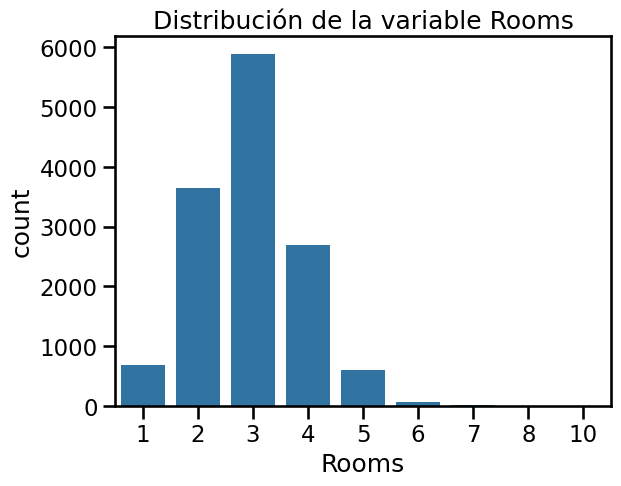

In [ ]:
sns.countplot(x="Rooms", data=df_melb)
plt.title('Distribución de la variable Rooms')
plt.show()

Tabla de frecuencias expresada como porcentaje

In [ ]:
df_melb.Rooms.value_counts(1)*100

Rooms
3    43.31
2    26.86
4    19.79
1     5.01
5     4.39
6     0.49
7     0.07
8     0.06
10    0.01
Name: proportion, dtype: float64

Con el gráfico y la ayuda de la tabla de frecuencias relativas, decidimos que la cantidad de viviendas que tengan mas de 5 habitaciones (representan menos del 1% del total) serán consideradas irrelevantes.



In [ ]:
mask_r=df_melb['Rooms'] < 6

* Variable numérica discreta **Car**: analizaremos los valores atípicos de esta variable con la misma lógica con la que trabajamos 'Rooms'. Primero medio de un gráfico de barrasvisualizamos si existe alguna cantidad atípica para el número de cocheras. Además en el resumen de variables numéricas vemos que 'Car' posee un máximo de 10 cocheras lo cual será un punto a analizar.

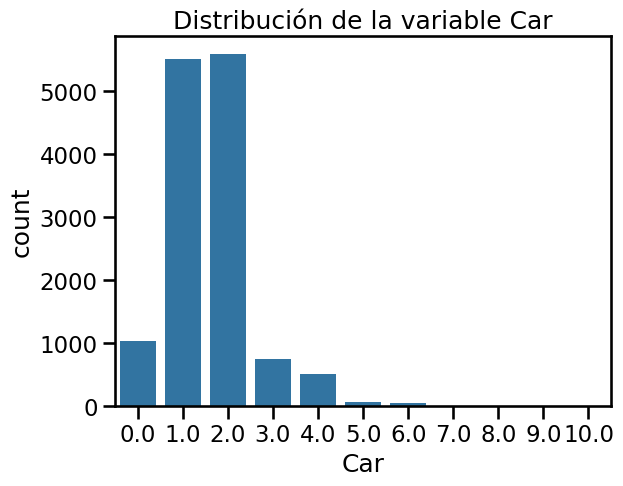

In [ ]:
sns.countplot(x="Car", data=df_melb)
plt.title('Distribución de la variable Car')
plt.show()

In [ ]:
df_melb.Car.value_counts(1)*100

Car
2.00    41.36
1.00    40.75
0.00     7.59
3.00     5.53
4.00     3.74
5.00     0.47
6.00     0.40
8.00     0.07
7.00     0.06
10.00    0.02
9.00     0.01
Name: proportion, dtype: float64

Con el gráfico y la ayuda de la tabla de frecuencias relativas, decidimos que la cantidad de viviendas que tengan mas de 4 cocheras (representan menos del 1% del total) serán consideradas irrelevantes.

In [ ]:
mask_c=df_melb['Car'] < 5

Variable numérica continua **Distance**: con esta variable sucede lo mismo que con Landsize, tiene un mínimo de $0$ lo cual podría considerarse atípico por tratarse de una distancia al centro de la ciudad de Melbourne. Sin embargo, CBD hace referencia a la región céntrica, en Wikipedia se puede encontrar la siguiente información${^{(1)}}$:

"El distrito central de negocios de Melbourne (también conocido coloquialmente simplemente como " La ciudad " o " El CBD ") es el centro de la ciudad y el área urbana principal de la ciudad de Melbourne , Victoria, Australia , centrada en Hoddle Grid , la más antigua parte de la ciudad trazada en 1837, e incluye sus márgenes."

Luego podemos considerar que hay viviendas dentro de esta región céntrica lo cual tendría lógica ese valor mínimo en el dataset.

(1) https://en.wikipedia.org/wiki/Melbourne_central_business_district

In [ ]:
#Conjunto de datos final de Melbourne
melb_1=df_melb.copy()
melb_1=melb_1[interesting_columns_melb]
mask= mask_b & mask_r & mask_c
df_melb_final=melb_1[mask]

El DataFrame que obtenemos luego de los análisis anteriores es el siguiente

In [ ]:
df_melb_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12137 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12137 non-null  object 
 1   SellerG        12137 non-null  object 
 2   CouncilArea    10946 non-null  object 
 3   Type           12137 non-null  object 
 4   BuildingArea   5825 non-null   float64
 5   Rooms          12137 non-null  int64  
 6   Propertycount  12137 non-null  float64
 7   Lattitude      12137 non-null  float64
 8   Longtitude     12137 non-null  float64
 9   Distance       12137 non-null  float64
 10  YearBuilt      6987 non-null   float64
 11  Car            12137 non-null  float64
 12  Postcode       12137 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df_melb_final.isnull().mean()*100

Suburb           0.00
SellerG          0.00
CouncilArea      9.81
Type             0.00
BuildingArea    52.01
Rooms            0.00
Propertycount    0.00
Lattitude        0.00
Longtitude       0.00
Distance         0.00
YearBuilt       42.43
Car              0.00
Postcode         0.00
dtype: float64

In [ ]:
df_melb_final.head()

,Suburb,SellerG,CouncilArea,Type,BuildingArea,Rooms,Propertycount,Lattitude,Longtitude,Distance,YearBuilt,Car,Postcode
0,Abbotsford,Biggin,Yarra,h,NaN,2,4019.00,-37.80,145.00,2.50,NaN,1.00,3067.00
1,Abbotsford,Biggin,Yarra,h,79.00,2,4019.00,-37.81,144.99,2.50,1900.00,0.00,3067.00
2,Abbotsford,Biggin,Yarra,h,150.00,3,4019.00,-37.81,144.99,2.50,1900.00,0.00,3067.00
3,Abbotsford,Biggin,Yarra,h,NaN,3,4019.00,-37.80,145.00,2.50,NaN,1.00,3067.00
4,Abbotsford,Nelson,Yarra,h,142.00,4,4019.00,-37.81,144.99,2.50,2014.00,2.00,3067.00


### 2.2 Combinacion de los _Dataset_

#### 2.2.1 Columnas de interes

Se vuelve a cargar el _Dataset_ con los datos de los Airbnb ya que el primero habia sido filtrado para trabajar más comodo y ahora necesitamos conocer todas las columnas y elegir algunas otras

In [ ]:
df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv')

<ipython-input-48-8a8721369c40>:1: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv')


In [ ]:
df_airbnb_f.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [ ]:
interesting_cols = ['street', 'neighborhood', 'city', 'suburb', 'state',
                    'zipcode', 'price', 'weekly_price', 'monthly_price',
                    'latitude', 'longitude']

Se agregan las siguientes columnas

In [ ]:
interesting_cols.append('bathrooms')
interesting_cols.append('bedrooms')

In [ ]:
interesting_cols

['street',
 'neighborhood',
 'city',
 'suburb',
 'state',
 'zipcode',
 'price',
 'weekly_price',
 'monthly_price',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms']

In [ ]:
columnas_relevantes=['price', 'weekly_price',  'monthly_price', 'zipcode']

In [ ]:
df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)

<ipython-input-54-3960e141b9c5>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)


In [ ]:
df_airbnb_f.columns

Index(['street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'latitude', 'longitude', 'bathrooms', 'bedrooms', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
df_airbnb_f.zipcode.head(5)

0    3105
1    3057
2    3182
3    3071
4    3183
Name: zipcode, dtype: object

In [ ]:
df_airbnb_f['zipcode'] = pd.to_numeric(df_airbnb_f.zipcode, errors='coerce') #If 'coerce', then invalid parsing will be set as NaN.

In [ ]:
df_airbnb_f['zipcode'] = df_airbnb_f.zipcode.fillna(0).astype('int')

Observamos la distribución de la variable price, monthly_price y weekly_price.

<ipython-input-59-8f6d2b014e16>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x=df_airbnb_f[nombre], ax=eje)
<ipython-input-59-8f6d2b014e16>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x=df_airbnb_f[nombre], ax=eje)
<ipython-input-59-8f6d2b014e16>:5: UserWarning: 

`distplot` is a depr

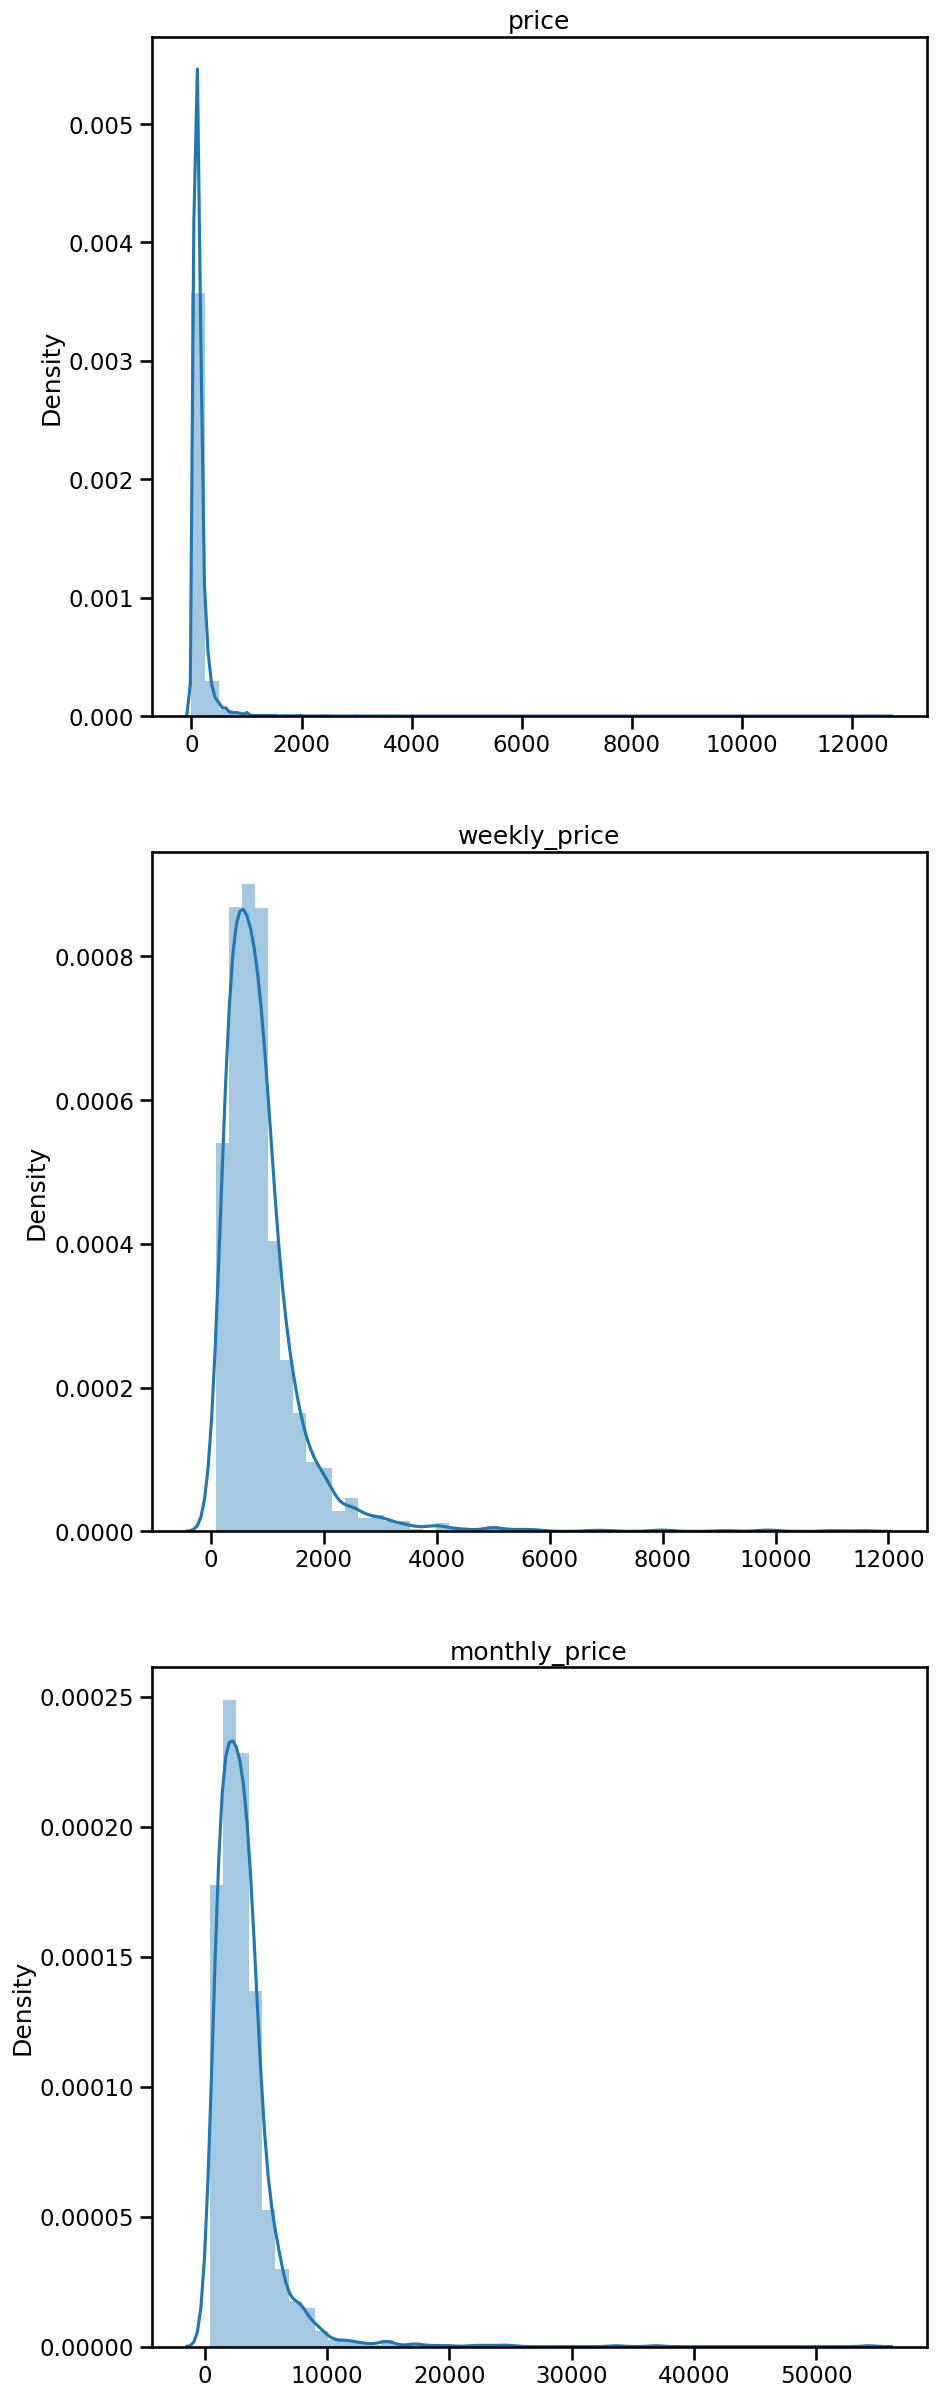

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(10,30))
columnas_price=['price', 'weekly_price',  'monthly_price']

for nombre, eje in zip(columnas_price, axes):
    sns.distplot( x=df_airbnb_f[nombre], ax=eje)
    eje.set_title(nombre)

plt.show()

Como las variables asociadas a price tienen un insesgamiento hacia la derecha, vamos a utilizar la mediana de la muestra como criterio para transformar dichos datos. Entonces, agrupamos por zipcode y obtenemos la mediana de price, weekly_price y monthly_price por cada subgrupo.

In [ ]:
airbnb_prices_by_zipcode = df_airbnb_f[columnas_relevantes].groupby('zipcode').agg(airbnb_price_median=('price', 'median'), airbnb_weekly_price_median=('weekly_price', 'median'), airbnb_monthly_price_median=('monthly_price', 'median')).reset_index()

In [ ]:
airbnb_prices_by_zipcode[:10]

,zipcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median
0,0,120.00,780.00,3300.00
1,2010,40.00,NaN,NaN
2,2134,50.00,NaN,NaN
3,2582,104.00,NaN,NaN
4,3000,129.00,857.00,3469.00
5,3001,132.50,NaN,NaN
6,3002,130.00,775.00,3300.00
7,3003,120.00,728.00,2500.00
8,3004,130.00,1000.00,3895.00
9,3006,150.00,1099.50,3955.00


Vamos a inspeccionar cuáles son los registros más altos por zipcode.

In [ ]:
num_registros_zipcode=df_airbnb_f.groupby('zipcode').agg(cantidad_reg=('zipcode','count')).reset_index()
num_registros_zipcode.sort_values(by='cantidad_reg', ascending=True)

,zipcode,cantidad_reg
247,30122,1
204,3785,1
230,3912,1
200,3778,1
188,3753,1
...,...,...
8,3004,728
117,3141,881
155,3182,1135
9,3006,1268


Consideramos que todos los zipcode con registros mayores a 1 son significativos para enriquecer la base de datos de Melbourne.

In [ ]:
zip_1=num_registros_zipcode[num_registros_zipcode.cantidad_reg>1][['zipcode']]
zip_1.reset_index(drop=True)

,zipcode
0,0
1,3000
2,3001
3,3002
4,3003
...,...
223,3975
224,3976
225,3977
226,3978


filtramos los datos de airbnb_prices_by_zipcode por aquellos zipcode que tengan más de 1 registro.

In [ ]:
b=airbnb_prices_by_zipcode.reset_index(drop=True)
airbnb_prices_by_zipcode_final=b.loc[b['zipcode'].isin(zip_1['zipcode'])]
airbnb_prices_by_zipcode_final.zipcode.describe() #controlamos que los valores de zipcode estén en el rango elegido

count    228.00
mean    3246.88
std      363.90
min        0.00
25%     3069.50
50%     3141.50
75%     3202.50
max     3980.00
Name: zipcode, dtype: float64

In [ ]:
airbnb_prices_by_zipcode_final=airbnb_prices_by_zipcode_final.reset_index(drop=True)

#### 2.2.2 Union por zipcode

In [ ]:
merged_sales_df = df_melb_final.merge(
    airbnb_prices_by_zipcode_final, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

,Suburb,SellerG,CouncilArea,Type,BuildingArea,Rooms,Propertycount,Lattitude,Longtitude,Distance,YearBuilt,Car,Postcode,zipcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median
2725,Hampton East,Hodges,Bayside,h,NaN,3,2356.00,-37.93,145.03,14.50,NaN,2.00,3188.00,3188.00,163.00,650.00,2500.00
3338,Malvern,Noel,Stonnington,u,NaN,2,4675.00,-37.85,145.04,7.40,1970.00,2.00,3144.00,3144.00,140.00,627.50,3000.00
7606,Yarraville,Jas,Maribyrnong,h,201.00,4,6543.00,-37.81,144.89,7.00,1890.00,0.00,3013.00,3013.00,108.50,800.00,2000.00
9661,Port Melbourne,Cayzer,Port Phillip,u,NaN,2,8648.00,-37.84,144.94,3.50,NaN,1.00,3207.00,3207.00,152.00,1100.00,3600.00
6067,Carlton,Nelson,Melbourne,h,NaN,4,6786.00,-37.80,144.97,1.80,NaN,2.00,3053.00,3053.00,90.00,840.00,2850.00


Se elimina la columna 'zipcode' ya que es igual a 'Postcode'

In [ ]:
merged_sales_df=merged_sales_df.drop('zipcode', axis=1)

In [ ]:
merged_sales_df.isnull().mean()*100

Suburb                         0.00
SellerG                        0.00
CouncilArea                    9.81
Type                           0.00
BuildingArea                  52.01
Rooms                          0.00
Propertycount                  0.00
Lattitude                      0.00
Longtitude                     0.00
Distance                       0.00
YearBuilt                     42.43
Car                            0.00
Postcode                       0.00
airbnb_price_median            0.17
airbnb_weekly_price_median     6.72
airbnb_monthly_price_median    9.69
dtype: float64

In [ ]:
merged_sales_df.columns, merged_sales_df.shape

(Index(['Suburb', 'SellerG', 'CouncilArea', 'Type', 'BuildingArea', 'Rooms',
        'Propertycount', 'Lattitude', 'Longtitude', 'Distance', 'YearBuilt',
        'Car', 'Postcode', 'airbnb_price_median', 'airbnb_weekly_price_median',
        'airbnb_monthly_price_median'],
       dtype='object'),
 (12137, 16))

#### 2.2.3 Otras variables para combinar los datos

Para predecir precios de viviendas o de cualquier entidad a la cual se le pueda asociar datos con connotación geográfica es de importacia pensar en métodos de geolocalización.

La geolocalización es cada vez más habitual en la analítica de negocio e inteligencia comercial y para utilizarla debemos poder ubicar el objeto de estudio (o nuestra unidad experimental) en un mapa. Esta estrategia permite estudiar el problema en un contexto más amplio y preciso, es decir, si un cliente solo brinda su Código Postal (CP) o su Provincia, su coordenada geográfica será el centroide del CP o de la provincia, y tendrá nivel de precisión bajo; en cambio, si otro cliente indica una dirección completa y válida, sus coordenadas estarán en el número de vía y, por tanto, tendrá un nivel de precisión alto.

Una de las ventajas de contar con la geolocalización es que podemos aportar información externa a nuestra base de datos. Al momento de geolocalizar una vivienda, podemos cualificar su entorno: podemos saber el nivel de renta, precio de las propiedades circundantes, la distancia a los principales centros comerciales o de educación, etc. Así, el enlace o cruce con otra información permite enriquecer la representación de la realidad que se busca.


Para poder sacar provecho de esta tecnología es necesario trabajar con coordenadas geográficas, es decir, latitud y longitud. Bajo este enfonque sería interesante poder combinar ambos dataset, Melbourne y AirBnB, por medio de las variables Lattitude y Longtitude.

Ambas variables serían adecuadas si pudieramos validar su consistencia y homogeneidad, por lo cual podríamos suponer que contamos con API's de georreferenciación que nos ayuden a constatarlo.


In [ ]:
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
df_melb[['Lattitude', 'Longtitude']]

,Lattitude,Longtitude
0,-37.799600,144.998400
1,-37.807900,144.993400
2,-37.809300,144.994400
3,-37.796900,144.996900
4,-37.807200,144.994100
...,...,...
13575,-37.905620,145.167610
13576,-37.859270,144.879040
13577,-37.852740,144.887380
13578,-37.859080,144.892990


In [ ]:
df_airbnb[['latitude', 'longitude']]

,latitude,longitude
0,-37.772684,145.092133
1,-37.766505,144.980736
2,-37.859755,144.977369
3,-37.758971,144.989228
4,-37.864530,144.992238
...,...,...
22890,-37.802415,144.962967
22891,-37.705095,144.574474
22892,-37.875252,145.162757
22893,-37.827795,144.954987


In [ ]:
print('Lat.\tMedia df_melb:\t\t', df_melb.Lattitude.mean())
print('Lat.\tMedia df_airbnb:\t', df_airbnb.latitude.mean())
print('Long.\tMedia df_melb:\t\t', df_melb.Longtitude.mean())
print('Long.\tMedia df_airbnb:\t', df_airbnb.longitude.mean())

Lat.	Media df_melb:		 -37.80920273343152
Lat.	Media df_airbnb:	 -37.826827302354666
Long.	Media df_melb:		 144.99521618777615
Long.	Media df_airbnb:	 145.00845712462984


In [ ]:
print('Desv. std. df_melb:\t', df_melb.Lattitude.std())
print('Desv. std. df_airbnb:\t', df_airbnb.latitude.std())
print('Desv. std. df_melb:\t', df_melb.Longtitude.std())
print('Desv. std. df_airbnb:\t', df_airbnb.longitude.std())

Desv. std. df_melb:	 0.07925982260355399
Desv. std. df_airbnb:	 0.0667471415268449
Desv. std. df_melb:	 0.10391556140737544
Desv. std. df_airbnb:	 0.1277106244242135


Se observa que presentan valores muy miliares entre si, con la diferencia de algunos decimales. Para poder unir ambos _Dataset_ se deberia:

- Investigar como se mide Latitud y Longitud
- Tomar un criterio para redondear los valores


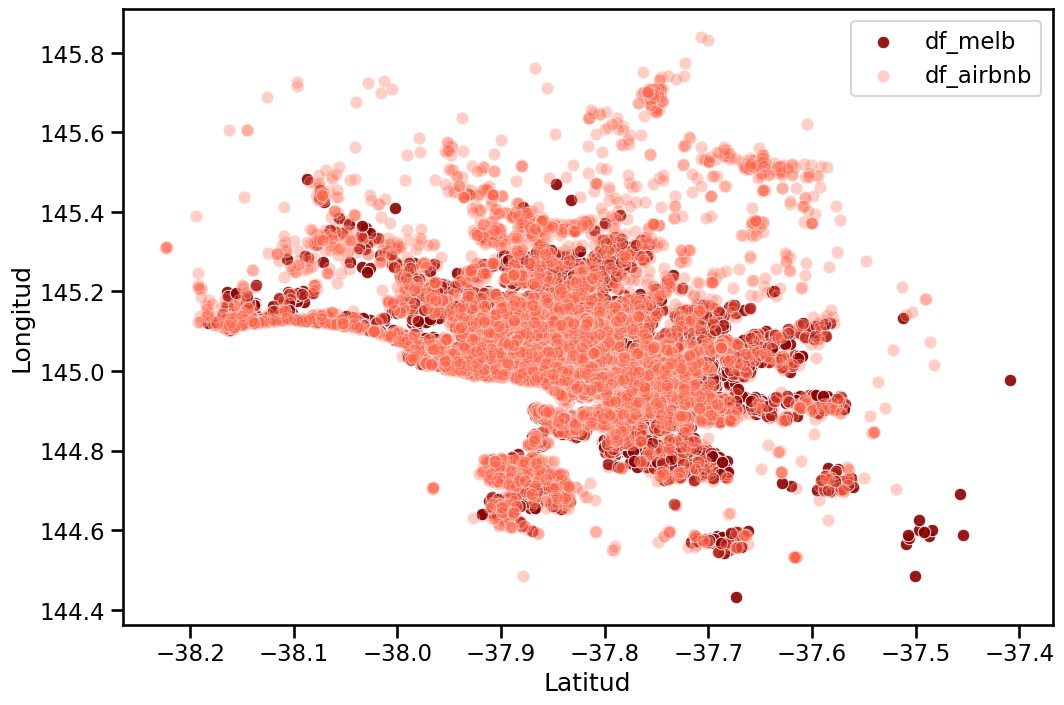

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_melb, x='Lattitude', y='Longtitude', label='df_melb', alpha=0.9, color='darkred')
sns.scatterplot(data=df_airbnb, x='latitude', y='longitude', label='df_airbnb', alpha=0.3, color='tomato')
#sns.kdeplot(data=df_melb, x='Lattitude', y='Longtitude', levels=5, cmap='Blues', linewidths=1)
#sns.kdeplot(data=df_airbnb, x='latitude', y='longitude', levels=5, cmap='Oranges', linewidths=1)

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.show()

El grafico muestra una gran similud en la distribucion de valores para ambas variables de los dos _Dataset_

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)
files.download('melb_data_extended.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en [Apache Airflow](https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html) que corra el ETL.

### 1. Script en Python ETL

Se crea el archivo de configuración, se importan varios módulos necesarios, establece la configuración del registro (logging), define tres funciones principales ```extract```, ```transform``` y ```load```, y luego llama a la función principal ```main()``` para ejecutar el proceso ETL

In [ ]:
%%writefile etlConfig.ini
##ETL jobs Parameters

[ETL_Log_Job] ##Job name
Job_Name = etl_log_job.py
LogName = etl_log_job.log
TgtConnection = Customers.db
SrcConnection = Customers.db
MelbourneSrcObject = https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv
AirbnbSrcObjetc = /content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv
TgtObject = customer
##Add more job details as needed

Overwriting etlConfig.ini


In [ ]:
%%writefile ETL_script.py
import logging.config
import time
import psutil
import configparser
import sqlite3
import pandas as pd

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

config = configparser.ConfigParser()
config.read('etlConfig.ini')
JobConfig = config['ETL_Log_Job']

formatter = logging.Formatter('%(levelname)s:  %(asctime)s:  %(process)s:  %(funcName)s:  %(message)s')
stream_handler = logging.StreamHandler()
file_handler = logging.FileHandler(JobConfig['LogName'])
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

def extract():
    logger.info('Start Extract Session')
    #logger.info('Source Filename: {}'.format(JobConfig['SrcObject']))
    try:
        melb_df = pd.read_csv(JobConfig['MelbourneSrcObject'])
        airbnb_df = pd.read_csv(JobConfig['AirbnbSrcObjetc'], low_memory=False)
        logger.info('Records count in Melbourne source file: {}'.format(len(melb_df.index)))
        logger.info('Records count in Airbnb source file: {}'.format(len(airbnb_df.index)))
    except ValueError as e:
        logger.error(e)
        return
    logger.info("Read completed")
    return melb_df, airbnb_df

def transform(melb_df, airbnb_df):
    try:
        airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')
        airbnb_df['zipcode'] = airbnb_df.zipcode.fillna(0).astype('int')

        airbnb_grouped = airbnb_df.groupby('zipcode').agg(
            airbnb_price_mean=('price', 'mean'),
            airbnb_record_count=('zipcode', 'count'),
            airbnb_weekly_price_mean=('weekly_price', 'mean'),
            airbnb_monthly_price_mean=('monthly_price', 'mean')
            ).reset_index()

        melb_df['Postcode'] = melb_df['Postcode'].astype(int)
        merged_df = pd.merge(melb_df, airbnb_grouped, left_on='Postcode', right_on='zipcode', how='left')

        logger.info('Transformation completed, data ready to load')

    except Exception as e:
        logger.error(e)
        return None

    return merged_df

def load(ldf):
    logger.info('Start Load Session')
    try:
        conn = sqlite3.connect(JobConfig['TgtConnection'])
        cursor = conn.cursor()
        logger.info('Connection to {} database established'.format(JobConfig['TgtConnection']))
    except Exception as e:
        logger.error(e)
        return

    #Load dataframe to table
    try:
        ldf.to_sql(JobConfig['TgtObject'], conn, if_exists='replace', index=False)
        logger.info("Data Loaded into target table: {}".format(JobConfig['TgtObject']))
    except Exception as e:
        logger.error(e)
        return
    conn.commit()
    logger.info("Data Loaded into target table: {}".format(JobConfig['TgtObject']))
    return

def main():
    start = time.time()

    ##Extract
    start1 = time.time()
    melb_df, airbnb_df = extract()
    end1 = time.time() - start1
    logger.info('Extract CPU usage {}%'.format(psutil.cpu_percent()))
    logger.info("Extract function took : {} seconds".format(end1))

    ##Transformation
    start2 = time.time()
    ldf = transform(melb_df, airbnb_df)
    end2 = time.time() - start2
    logger.info('Transform CPU usage {}%'.format(psutil.cpu_percent()))
    logger.info("Transformation took : {} seconds".format(end2))

    ##Load
    start3 = time.time()
    load(ldf)
    end3 = time.time() - start3
    logger.info('Load CPU usage {}%'.format(psutil.cpu_percent()))
    logger.info("Load took : {} seconds".format(end3))
    end = time.time() - start
    logger.info("ETL Job took : {} seconds".format(end))
    logger.info('Session Summary')
    logger.info('RAM memory {}% used:'.format(psutil.virtual_memory().percent))
    logger.info('CPU usage {}%'.format(psutil.cpu_percent()))
    print("multiple threads took : {} seconds".format(end))

if __name__=="__main__":
    logger.info('ETL Process Initialized')
    main()

Overwriting ETL_script.py


Luego de crear el archivo ```ETL_script.py```, se ejecuta mediante el comando ```%run```



In [ ]:
%run ETL_script.py

INFO:__main__:ETL Process Initialized
INFO:__main__:Start Extract Session
INFO:__main__:Records count in Melbourne source file: 13580
INFO:__main__:Records count in Airbnb source file: 22895
INFO:__main__:Read completed
INFO:__main__:Extract CPU usage 73.2%
INFO:__main__:Extract function took : 15.794764757156372 seconds
INFO:__main__:Transformation completed, data ready to load
INFO:__main__:Transform CPU usage 100.0%
INFO:__main__:Transformation took : 0.0497891902923584 seconds
INFO:__main__:Start Load Session
INFO:__main__:Connection to Customers.db database established
INFO:__main__:Data Loaded into target table: customer
INFO:__main__:Data Loaded into target table: customer
INFO:__main__:Load CPU usage 93.4%
INFO:__main__:Load took : 0.3050844669342041 seconds
INFO:__main__:ETL Job took : 16.165547370910645 seconds
INFO:__main__:Session Summary
INFO:__main__:RAM memory 13.7% used:
INFO:__main__:CPU usage 100.0%


multiple threads took : 16.165547370910645 seconds


<Figure size 640x480 with 0 Axes>

Finalmente se descar el script y el archivo de configuración

In [ ]:
files.download('ETL_script.py')
files.download('etlConfig.ini')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### DAG en Apache Airflow

Se define el flujo de trabajo DAG llamado 'ETL_process'. Este DAG consta de tres tareas: extracción, transformación y carga. Cada tarea se implementa utilizando el operador ```PythonOperator```, que ejecuta una fucion especifica



In [ ]:
#pip install apache-airflow --ignore-installed blinker

  Using cached apache_airflow-2.9.1-py3-none-any.whl (13.3 MB)
  Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
  Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
  Using cached argcomplete-3.3.0-py3-none-any.whl (42 kB)
  Using cached asgiref-3.8.1-py3-none-any.whl (23 kB)
  Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Using cached colorlog-4.8.0-py2.py3-none-any.whl (10 kB)
  Using cached ConfigUpdater-3.2-py2.py3-none-any.whl (34 kB)
  Using cached connexion-2.14.2-py2.py3-none-any.whl (95 kB)
  Using cached cron_descriptor-1.4.3-py3-none-any.whl (49 kB)
  Using cached croniter-2.0.5-py2.py3-none-any.whl (20 kB)
  Using cached cryptography-42.0.7-cp39-abi3-manylinux_2_28_x86_64.whl (3.8 MB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Using cached Flask_Caching-2.3.0-py3-none-any.whl (28 kB)
  Using cached flask_session-0.5.0-py3-none-any.whl (7.2 kB)
  Using cached flask_wtf-1.2.1-py3-none-an

In [ ]:
from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime

default_args = {
    'owner': 'airflow',
    'start_date': datetime(2024, 5, 25),
    'retries': 1,
}

with DAG(
    'ETL_process',
    default_args=default_args,
    description='DAG for ETL Process',
    schedule=None,
) as dag:
    extraction = PythonOperator(
        task_id='extraction',
        python_callable=extract
    )

    transform = PythonOperator(
        task_id='transformation',
        python_callable=transform
    )
    load = PythonOperator(
        task_id='load',
        python_callable=load
    )

    extraction >> transform >> load

ImportError: cannot import name '_plain_int' from 'werkzeug._internal' (/usr/local/lib/python3.10/dist-packages/werkzeug/_internal.py)